# Darwin's finches

by Hugo Ferreira (2018)

In this notebook, I will perform some very basic data and statistical analysis on data on [Darwin's finches](https://en.wikipedia.org/wiki/Darwin%27s_finches).

<img src="images/Darwins_finches.jpg" alt="Darwins_finches" style="width: 600px;"/>

This analysis was done as practice in Python and basic stats concepts such as hypothesis testing, confidnece intervals and linear regression.

The original data can be found in:

> Grant PR, Grant BR (2014) Data from: 40 years of evolution. Darwin's finches on Daphne Major Island. Dryad Digital Repository. https://doi.org/10.5061/dryad.g6g3h

The inspiration to create this notebook came from the *Statistical Thinking in Python* courses in [DataCamp](https://www.datacamp.com). The datasets (in csv format) were obtained in [here](https://github.com/johnashu/datacamp/tree/master/statistical-thinking-in-python-part-2).

In [20]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn and matplotlib styles
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')

## Finch beak length and depth

We'll focus our attention to two species of finches, the [medium ground finch](https://en.wikipedia.org/wiki/Medium_ground_finch) (*Geospiza fortis*) and the [common cactus finch](https://en.wikipedia.org/wiki/Common_cactus_finch) (*Geospiza scandens*), which live in the island of Daphne Major.

<img src="images/Geospiza_fortis.jpg" alt="Geospiza_fortis" style="width: 400px;"/>

<img src="images/Geospiza_scandens.jpg" alt="Geospiza_scandens" style="width: 400px;"/>

We have data for the beak length and depth for both species in 1975 and 2012.

### Exploratory data analysis (EDA) of beak length and depth

First, we import the data relative to 1975 and 2012 contained in two csv files.

In [3]:
data_1975 = pd.read_csv("data/finch_beaks_1975.csv")
data_2012 = pd.read_csv("data/finch_beaks_2012.csv")

In [6]:
data_1975.head()

,band,species,"Beak length, mm","Beak depth, mm"
0,2,fortis,9.4,8.0
1,9,fortis,9.2,8.3
2,12,fortis,9.5,7.5
3,15,fortis,9.5,8.0
4,305,fortis,11.5,9.9


In [7]:
data_2012.head()

,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2


In [4]:
# make column titles equal in both dataframes
data_1975.columns = data_2012.columns

In [10]:
data_1975.head()

,band,species,blength,bdepth
0,2,fortis,9.4,8.0
1,9,fortis,9.2,8.3
2,12,fortis,9.5,7.5
3,15,fortis,9.5,8.0
4,305,fortis,11.5,9.9


It will be useful for the analysis to have a single dataframe with all the information.

In [5]:
data = pd.concat([data_1975, data_2012], keys=['1975', '2012'], names=['year', ])

In [59]:
data.head()

band species  blength  bdepth
year                                 
1975 0     2  fortis      9.4     8.0
     1     9  fortis      9.2     8.3
     2    12  fortis      9.5     7.5
     3    15  fortis      9.5     8.0
     4   305  fortis     11.5     9.9

We obtain a dataframe with a hierarchical index, with levels 'year' and 'index'.It is convenient to have a simple index, which can be otained by resetting the index and dropping the 'index' column.

In [6]:
data.reset_index(level='year', inplace=True)

In [62]:
data.head()

,year,band,species,blength,bdepth
0,1975,2,fortis,9.4,8.0
1,1975,9,fortis,9.2,8.3
2,1975,12,fortis,9.5,7.5
3,1975,15,fortis,9.5,8.0
4,1975,305,fortis,11.5,9.9


First, we plot the beak length and depth measurements in 1975 and 2012 in two bee swarm plots.

#### Beak length

Text(0,0.5,'beak length (mm)')

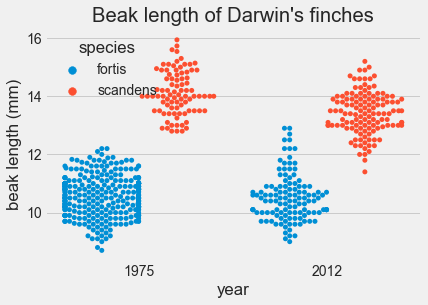

In [87]:
sns.swarmplot(x='year', y='blength', data=data, hue='species', dodge=True)
plt.title("Beak length of Darwin's finches")
plt.xlabel('year')
plt.ylabel('beak length (mm)')

We see that the *Geospiza scandens* has, on average, a longer beak that the *Geospiza fortis*, in both years, even though the difference seems smaller in 2012 than in 1975. In particular, the beak length of *Geospiza scandens* seems to have slightly decreased from 1975 to 2012.

#### Beak depth

Text(0,0.5,'beak depth (mm)')

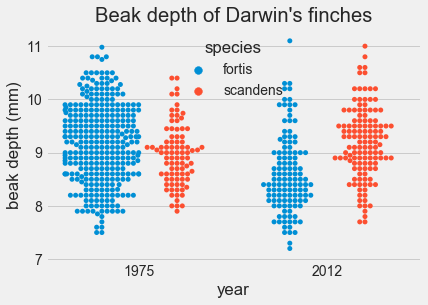

In [84]:
sns.swarmplot(x='year', y='bdepth', data=data, hue='species', dodge=True)
plt.title("Beak depth of Darwin's finches")
plt.xlabel('year')
plt.ylabel('beak depth (mm)')

As for the beak depth, the difference between the species is much smaller than in the case of the beak length. It is hard to see if there is a clear difference in the datasets bewtween the two years. To help with this, we will build the **empirical cumulative distribution function** (ECDF) for each data (for more info, see [here](https://en.wikipedia.org/wiki/Empirical_distribution_function)).

In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

**_Geospiza fortis_**

In [14]:
# arrays with beak depth for each year for fortis species
bd_1975_fortis = data[(data['year'] == '1975') & (data['species'] == 'fortis')]['bdepth'].values
bd_2012_fortis = data[(data['year'] == '2012') & (data['species'] == 'fortis')]['bdepth'].values

In [112]:
# computation of ECDF for fortis species
x_bd_1975_fortis, y_bd_1975_fortis = ecdf(bd_1975_fortis)
x_bd_2012_fortis, y_bd_2012_fortis = ecdf(bd_2012_fortis)

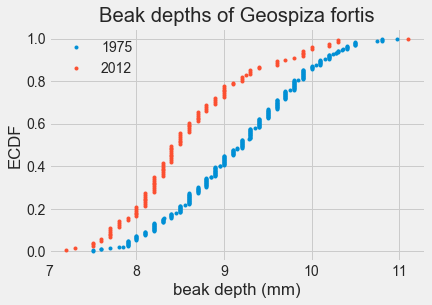

In [113]:
# plot of ECDFs for fortis species
plt.plot(x_bd_1975_fortis, y_bd_1975_fortis, marker='.', ls='none')
plt.plot(x_bd_2012_fortis, y_bd_2012_fortis, marker='.', ls='none')
plt.title('Beak depths of Geospiza fortis')
plt.xlabel('beak depth (mm)')
plt.ylabel('ECDF')
plt.legend(('1975', '2012'), loc='upper left')

The differences in beak depths between 1975 and 2012 are much clearer in the ECDF. Namely, the mean is mean is *smaller* in the 2012 data. 

**_Geospiza scandens_**

In [15]:
# arrays with beak depth for each year for scandens species
bd_1975_scandens = data[(data['year'] == '1975') & (data['species'] == 'scandens')]['bdepth'].values
bd_2012_scandens = data[(data['year'] == '2012') & (data['species'] == 'scandens')]['bdepth'].values

In [116]:
# computation of ECDF for scandens species
x_bd_1975_scandens, y_bd_1975_scandens = ecdf(bd_1975_scandens)
x_bd_2012_scandens, y_bd_2012_scandens = ecdf(bd_2012_scandens)

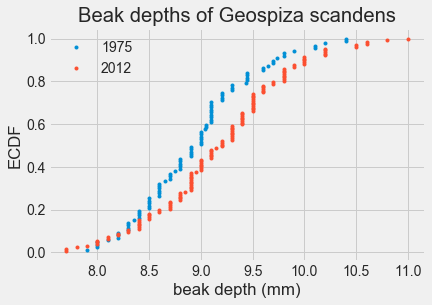

In [117]:
# plot of ECDFs for scandens species
plt.plot(x_bd_1975_scandens, y_bd_1975_scandens, marker='.', ls='none')
plt.plot(x_bd_2012_scandens, y_bd_2012_scandens, marker='.', ls='none')
plt.title('Beak depths of Geospiza scandens')
plt.xlabel('beak depth (mm)')
plt.ylabel('ECDF')
plt.legend(('1975', '2012'), loc='upper left')

Once again, the difference between the 1975 and 2012 is clearer, and the mean of the beak depth is *larger* in the 2012 data.

### Parameter estimation of beak depths

Let's now focus on the beak depth measurements of the *Geospiza scandens*. The EDA above indicates that the mean of the beak depth is larger in the 2012 data, in comparison with the 1975 data. We now estimate the difference of the mean beak depth and report a 95% confidence interval. For that, we will generate **bootstrap replicates** from the dataset.

In [10]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        # bootstrap resampling using np.random.choice
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates

First, we compute the *observed* difference of means of the beak depth in 2012 and 1975:

In [121]:
np.mean(bd_2012_scandens) - np.mean(bd_1975_scandens)

0.22622047244094645

Second, we obtain 10000 bootstrap replicates of the mean for the 1975 and 2012 beak depths and their difference:

In [124]:
bs_replicates_1975 = draw_bs_reps(bd_1975_scandens, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_scandens, np.mean, size=10000)
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

Using the replicates, we compute the **95% confidence interval** for the difference of means:

In [125]:
np.percentile(bs_diff_replicates, [2.5, 97.5])

array([0.06298165, 0.38946199])

It is quite clear from the observed difference of means and its 95% confidence interval that the beaks of the *Geospiza scandens* got deeper from 1975 to 2012.

### Hypothesis test: are the beak depths larger in 2012?

As mentioned above, it is clear that the mean of the beak depth of the *Geospiza scandens* has increased from 1975 to 2012. Is it possible that this effect is due to random chance? That is, what is the probability that we would obtain the observed difference in means if the means were actually the same?

To check this, we perform a **hypothesis test**.

**Null hypothesis:** the mean beak depth in 1975 is equal to the mean beak depth in 2012.

The **test statistic** we are going to use is the difference in mean beak depth. Under the null hypothesis, it should be zero. To test the null hypothesis, we are going to shift the two data sets so that they have the same mean, and then resample them using bootstrap and compute the difference of means. Finally, we compute the **p-value**, that is the probability of obtaining a difference in mean beak depth equal or greater than the *observed* difference in mean beak depth, under the assumption the null hypothesis is true.

In [139]:
# mean of the combined data set
combined_mean = np.mean(np.concatenate((bd_1975_scandens, bd_2012_scandens)))

# shift of the data sets so that they have the same mean (combined_mean)
bd_1975_scandens_shifted = bd_1975_scandens - np.mean(bd_1975_scandens) + combined_mean
bd_2012_scandens_shifted = bd_2012_scandens - np.mean(bd_2012_scandens) + combined_mean

# obtain 10000 bootstrap replicates of the mean for the shifted data sets and their difference
bs_replicates_1975 = draw_bs_reps(bd_1975_scandens_shifted, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_scandens_shifted, np.mean, size=10000)
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# compute the p-value
p = np.sum(bs_diff_replicates >= np.mean(bd_2012_scandens) - np.mean(bd_1975_scandens)) / len(bs_diff_replicates)

The p-value is then:

In [140]:
print(p)

0.0034


Therefore, 0.34% of the bootstrap replicates had a difference in mean beak depth equal or greater than the observed in the samples. This indicates that the probability that the increase in beak depth is due to chance is only 0.34%, thus, there is a *statistically significant* difference. For the samples, that difference was approximately 0.2 mm in 37 years, which is significant by evolutionary standards. If, for example, the beak depth kept changing at this rate, it would double in only 400 years!

### Variation of beak shape

Above, we saw that the beak depth for the *Geospiza scandens* increased from 1975 and 2012. We may also wonder how the beak *shape* has evolved, that is, the ratio between the beak depth and length. If the length and the depth have increased approximately in the same proportion, the overall shape of the beak would not change appreciably.

Let's start with some basic EDA, by making a scatter plot of the beak depth versus beak length for the 1975 and 2012 data.

In [16]:
# arrays with beak length for each year for scandens species
bl_1975_scandens = data[(data['year'] == '1975') & (data['species'] == 'scandens')]['blength'].values
bl_2012_scandens = data[(data['year'] == '2012') & (data['species'] == 'scandens')]['blength'].values

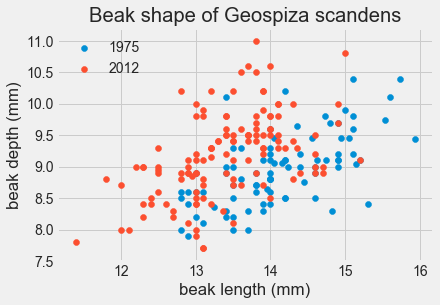

In [22]:
# scatter plot of beak depth vs length for the scandens species
plt.scatter(x=bl_1975_scandens, y=bd_1975_scandens)
plt.scatter(x=bl_2012_scandens, y=bd_2012_scandens)
plt.title('Beak shape of Geospiza scandens')
plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975', '2012'), loc='upper left')

We see (as in the previous plots) that the beaks got deeper (the red points are slightly higher) but also shorter (the red points are mostly to the left). Thus, it seems that the beak shape has *not* stayed the same. However, in both years, it looks like the beak depth increases approximately linearly with its length.

To see that, let's perform a liner regression for both the 1975 and 2012 data.

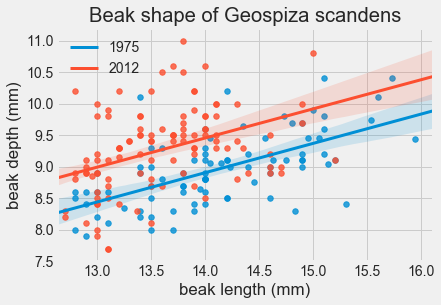

In [44]:
# scatter plot of beak depth vs length for the scandens species and linear regression for each year
sns.regplot(x=bl_1975_scandens, y=bd_1975_scandens, ci=95, scatter_kws={"s": 30}, line_kws={"lw": 3})
sns.regplot(x=bl_2012_scandens, y=bd_2012_scandens, ci=95, scatter_kws={"s": 30}, line_kws={"lw": 3})
plt.title('Beak shape of Geospiza scandens')
plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975', '2012'), loc='upper left')

Below, we obtain the linear regression parameters and their 95% confidence intervals (95% CI), as represented in the plot above. For that, we first define a new function which performs pairs bootstrap for linear regression.

In [60]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_a_reps, bs_b_reps
    bs_a_reps = np.empty(size)
    bs_b_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        # bootstrap resampling using np.random.choice
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_a_reps[i], bs_b_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_a_reps, bs_b_reps

In [61]:
# Compute the linear regressions parameters
a_1975, b_1975 = np.polyfit(bl_1975_scandens, bd_1975_scandens, 1)
a_2012, b_2012 = np.polyfit(bl_2012_scandens, bd_2012_scandens, 1)

# Perform pairs bootstrap for the linear regressions
bs_a_reps_1975, bs_b_reps_1975 = draw_bs_pairs_linreg(bl_1975_scandens, bd_1975_scandens, size=1000)
bs_a_reps_2012, bs_b_reps_2012 = draw_bs_pairs_linreg(bl_2012_scandens, bd_2012_scandens, size=1000)

# Compute confidence intervals of slopes
a_conf_int_1975 = np.percentile(bs_a_reps_1975, [2.5, 97.5])
a_conf_int_2012 = np.percentile(bs_a_reps_2012, [2.5, 97.5])
b_conf_int_1975 = np.percentile(bs_b_reps_1975, [2.5, 97.5])
b_conf_int_2012 = np.percentile(bs_b_reps_2012, [2.5, 97.5])

# Print the results
print("Linear regression for 1975: a =", round(a_1975, 3), ", 95% CI =", a_conf_int_1975.round(3),
      ", b =", round(b_1975, 3), ", 95% CI =", b_conf_int_1975.round(3))
print("Linear regression for 2012: a =", round(a_2012, 3), ", 95% CI =", a_conf_int_2012.round(3),
      ", b =", round(b_2012, 3), ", 95% CI =", b_conf_int_2012.round(3))

Linear regression for 1975: a = 0.465 , 95% CI = [0.334 0.594] , b = 2.391 , 95% CI = [0.571 4.261]
Linear regression for 2012: a = 0.463 , 95% CI = [0.336 0.603] , b = 2.977 , 95% CI = [1.131 4.735]


We see that both linear regressions have approximately the same slope (for every mm in beak length the depth increases about half mm), but different intercepts. But how did the ratio of beak length to depth evolved from 1975 to 2012?

Below we compute the mean ratio in both 1975 and 2012 and theirn 95% confidence interval.

In [68]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975_scandens / bd_1975_scandens
ratio_2012 = bl_2012_scandens / bd_2012_scandens

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, size=10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

# Print the results
print("Ratio in 1975: mean =", round(mean_ratio_1975, 3), ", 99% CI =", conf_int_1975.round(3))
print("Ratio in 2012: mean =", round(mean_ratio_2012, 3), ", 99% CI =", conf_int_2012.round(3))

Ratio in 1975: mean = 1.579 , 99% CI = [1.556 1.601]
Ratio in 2012: mean = 1.466 , 99% CI = [1.444 1.489]


We observe that the mean ratio decreased by about 0.1 mm (or 7%) and the 99% confidence intervals do not overlap. Therefore, we can conclude that the beak shape actually changed from 1975 to 2012.